# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

from collections import deque

# The agent
from dqn_agent   import Agent

import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
def start_UnityEnvironment():
    return UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

env = start_UnityEnvironment()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 2.0


When finished, you can close the environment.

In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### 4.1 Watch an untrained agent

Define an agent who just act based on the state and his randomly initialized weights, no learning happens

In [8]:
env = start_UnityEnvironment()

agent = Agent(state_size, action_size, seed=0)

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state    = env_info.vector_observations[0]         # get the current state

while True:
    action = agent.act(state)                     # act to select an action based on state
    
    env_info   = env.step(action)[brain_name]     # send the action to the environment
    next_state = env_info.vector_observations[0]  # get the next state
    reward     = env_info.rewards[0]              # get the reward
    done       = env_info.local_done[0]           # see if episode has finished
    
    state = next_state
    if done:
        break

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


#### 4.2 Training definition

Define a function to help us train an agent.

In [9]:
def dqn(agent, n_episodes=2000, score_window_length=100, env_solved_threshold=13., eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ====== 
        agent      (Agent)           : Agent to be trained
        n_episodes (int)             : maximum number of training episodes
        score_window_length (int)    : length of the window used to average scores
        env_solved_threshold (float) : average score over last scrore_window_length to consider the env solved
        eps_start (float)            : starting value of epsilon, for epsilon-greedy action selection
        eps_end (float)              : minimum value of epsilon
        eps_decay (float)            : multiplicative factor (per episode) for decreasing epsilon
        
    Return
    ======
        scores    : array of the score by episode
        is_solved : bool to know if we solved it or not
        solved_in : number of episode to solved it, if solved
    """
    is_solved = False
    solved_in = -1
    
    scores = []                                        # list containing scores from each episode
    scores_window = deque(maxlen=score_window_length)  # last scrore_window_length scores
    eps = eps_start                                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state    = env_info.vector_observations[0]        # get the current state
        
        score = 0
        while True:
            action = agent.act(state, eps)                 # act to select epsilon greedy action
            
            env_info   = env.step(action)[brain_name]      # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward     = env_info.rewards[0]               # get the reward
            done       = env_info.local_done[0]            # see if episode has finished
            
            # Send experience to the agent, so the learning happens
            agent.step(state, action, reward, next_state, done)
            
            # Rollover next state
            state = next_state
            
            score += reward

            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=env_solved_threshold:
            is_solved = True
            solved_in = i_episode-score_window_length
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(solved_in, np.mean(scores_window)))
            break

    return scores, is_solved, solved_in


#### 4.3 Agent configuration to train with and find the best one

We will experiment with different configuration with or without dueling network

* Simple DQN (No Q_target, no Replay Buffer)
* DQN + Replay Buffer
* DQN + Replay Buffer + Q_target
* DDQN + Replay Buffer + Q_target
* DDQN + Pritoritized Replay Buffer + Q_target (For dueling network test with alpha from 0.1 to 0.9)

In [10]:
config_of = {
    'DQN'         : { 'use_DUELING': False, 'use_RB': False, 'use_TM': False, 'use_DDQN': False, 'use_PER': False },
    
    'DQN_RB'      : { 'use_DUELING': False, 'use_RB': True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                            'use_TM': False, 'use_DDQN': False, 'use_PER': False },
    
    'DQN_RB_TM'   : { 'use_DUELING': False, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                            'use_TM'  : True, 'TM_update_every': 4,
                                            'use_DDQN': False, 'use_PER': False },

    'DDQN_RB_TM'  : { 'use_DUELING': False, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                            'use_TM'  : True, 'TM_update_every': 4,
                                            'use_DDQN': True, 'use_PER': False },
    
    'DDQN_PER_TM' : { 'use_DUELING': False, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                            'use_TM'  : True, 'TM_update_every': 4,
                                            'use_DDQN': True,
                                            'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.3,
                                            'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    
    'DQN_DUEL'         : { 'use_DUELING': True, 'use_RB': False, 'use_TM': False, 'use_DDQN': False, 'use_PER': False },
    
    'DQN_RB_DUEL'      : { 'use_DUELING': True, 'use_RB': True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM': False, 'use_DDQN': False, 'use_PER': False },
    
    'DQN_RB_TM_DUEL'   : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': False, 'use_PER': False },

    'DDQN_RB_TM_DUEL'  : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True, 'use_PER': False },
    
    'DDQN_PER_TM_DUEL_1' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.1,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    'DDQN_PER_TM_DUEL_2' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.2,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    'DDQN_PER_TM_DUEL_3' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.3,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    'DDQN_PER_TM_DUEL_4' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.4,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    'DDQN_PER_TM_DUEL_5' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.5,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    'DDQN_PER_TM_DUEL_6' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.6,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    'DDQN_PER_TM_DUEL_7' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.7,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    'DDQN_PER_TM_DUEL_8' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.8,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
    'DDQN_PER_TM_DUEL_9' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.9,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
}

SCORE_WINDOW_LENGTH=100
ENV_SOLVED_THRESHOLD=13

##### 4.3.1 Best configuration

If you want to train only with one configuration, execute the cell below.
If you want to reproduce the experiment with all the different cells, do no execute the cell below

In [ ]:
# To train only with the best configuration
config_of = {
    'DDQN_PER_TM_DUEL_9' : { 'use_DUELING': True, 'use_RB'  : True, 'RB_size': int(1e5), 'RB_batch_size' :64,
                                                'use_TM'  : True, 'TM_update_every': 4,
                                                'use_DDQN': True,
                                                'use_PER' : True, 'PER_epsilon': 0.01, 'PER_alpha': 0.9,
                                                'PER_beta': 0.4, 'PER_beta_increment': 0.001 },
}

SCORE_WINDOW_LENGTH=100
ENV_SOLVED_THRESHOLD=13

#### 4.4 Effective training using all the different configuration



================ Training : DQN ================
Episode 100	Average Score: -0.12
Episode 200	Average Score: 0.091
Episode 300	Average Score: -0.14
Episode 400	Average Score: 0.491
Episode 500	Average Score: 4.17
Episode 600	Average Score: 8.59
Episode 700	Average Score: 9.11
Episode 800	Average Score: 10.23
Episode 900	Average Score: 11.24
Episode 1000	Average Score: 11.93
Episode 1100	Average Score: 10.84
Episode 1200	Average Score: 11.62
Episode 1300	Average Score: 11.49
Episode 1400	Average Score: 12.03
Episode 1500	Average Score: 12.65
Episode 1565	Average Score: 13.02
Environment solved in 1465 episodes!	Average Score: 13.02


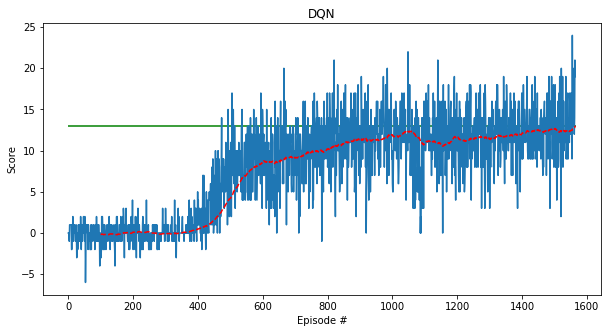



================ Training : DQN_RB ================
Episode 100	Average Score: 0.01
Episode 200	Average Score: 0.291
Episode 300	Average Score: 0.45
Episode 400	Average Score: 1.55
Episode 500	Average Score: 4.88
Episode 600	Average Score: 5.63
Episode 700	Average Score: 9.16
Episode 800	Average Score: 11.07
Episode 900	Average Score: 10.92
Episode 1000	Average Score: 11.80
Episode 1100	Average Score: 10.69
Episode 1200	Average Score: 12.68
Episode 1215	Average Score: 13.00
Environment solved in 1115 episodes!	Average Score: 13.00


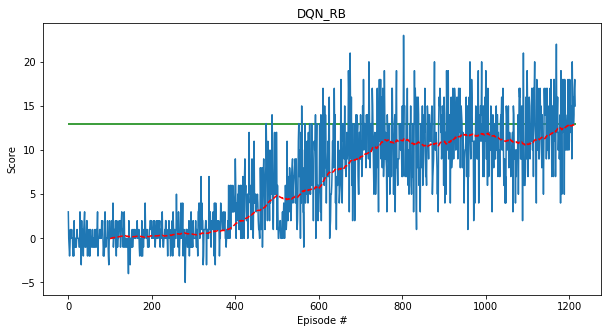



================ Training : DQN_RB_TM ================
Episode 100	Average Score: 0.25
Episode 200	Average Score: 3.34
Episode 300	Average Score: 5.56
Episode 400	Average Score: 7.27
Episode 500	Average Score: 9.44
Episode 600	Average Score: 11.18
Episode 700	Average Score: 12.73
Episode 709	Average Score: 13.02
Environment solved in 609 episodes!	Average Score: 13.02


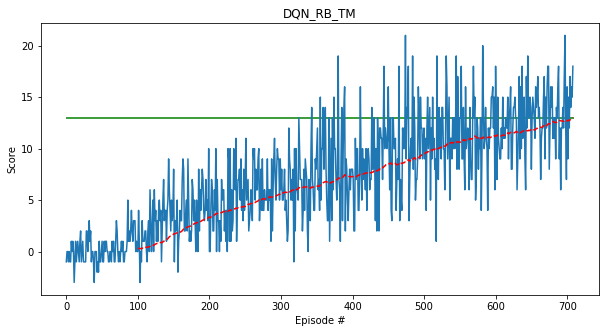



================ Training : DDQN_RB_TM ================
Episode 100	Average Score: 0.11
Episode 200	Average Score: 2.87
Episode 300	Average Score: 5.38
Episode 400	Average Score: 6.76
Episode 500	Average Score: 7.96
Episode 600	Average Score: 9.18
Episode 700	Average Score: 10.63
Episode 800	Average Score: 10.76
Episode 900	Average Score: 11.65
Episode 1000	Average Score: 11.55
Episode 1100	Average Score: 11.95
Episode 1182	Average Score: 13.00
Environment solved in 1082 episodes!	Average Score: 13.00


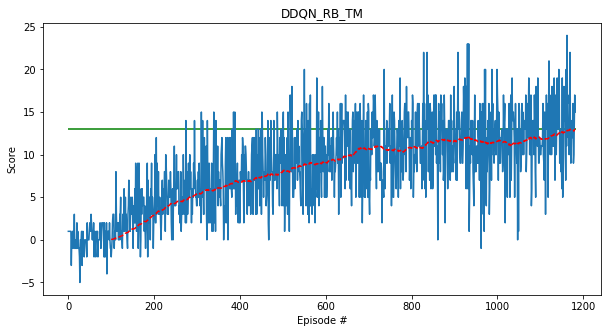



================ Training : DDQN_PER_TM ================
Episode 100	Average Score: 0.44
Episode 200	Average Score: 2.05
Episode 300	Average Score: 4.39
Episode 400	Average Score: 7.23
Episode 500	Average Score: 9.00
Episode 600	Average Score: 10.54
Episode 700	Average Score: 11.32
Episode 800	Average Score: 11.35
Episode 900	Average Score: 11.99
Episode 1000	Average Score: 12.47
Episode 1032	Average Score: 13.04
Environment solved in 932 episodes!	Average Score: 13.04


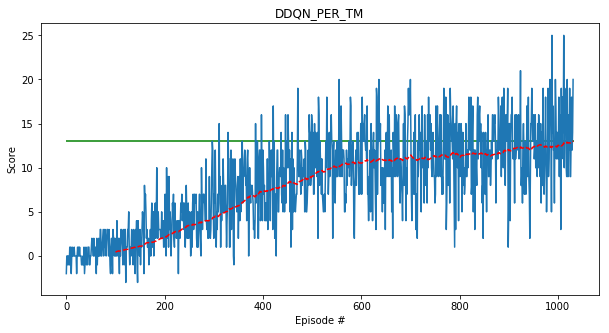



================ Training : DQN_DUEL ================
Episode 100	Average Score: 0.15
Episode 200	Average Score: 0.11
Episode 300	Average Score: 2.79
Episode 400	Average Score: 6.94
Episode 500	Average Score: 8.93
Episode 600	Average Score: 11.24
Episode 700	Average Score: 12.46
Episode 730	Average Score: 13.05
Environment solved in 630 episodes!	Average Score: 13.05


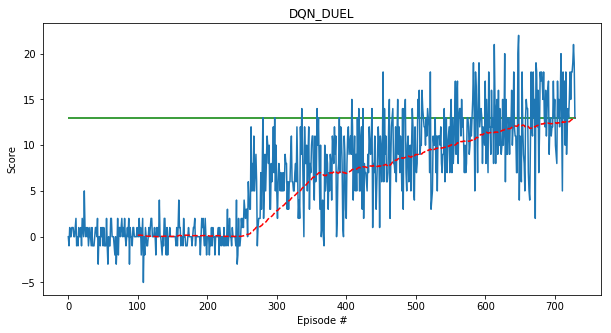



================ Training : DQN_RB_DUEL ================
Episode 100	Average Score: 0.12
Episode 200	Average Score: -0.32
Episode 300	Average Score: 2.341
Episode 400	Average Score: 5.61
Episode 500	Average Score: 9.16
Episode 600	Average Score: 11.76
Episode 681	Average Score: 13.02
Environment solved in 581 episodes!	Average Score: 13.02


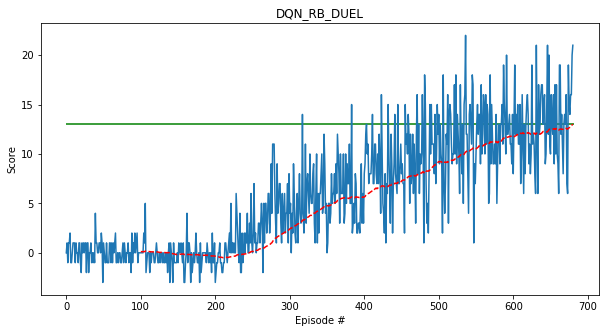



================ Training : DQN_RB_TM_DUEL ================
Episode 100	Average Score: 0.28
Episode 200	Average Score: 1.10
Episode 300	Average Score: 6.37
Episode 400	Average Score: 8.00
Episode 500	Average Score: 11.03
Episode 600	Average Score: 12.09
Episode 700	Average Score: 11.92
Episode 743	Average Score: 13.03
Environment solved in 643 episodes!	Average Score: 13.03


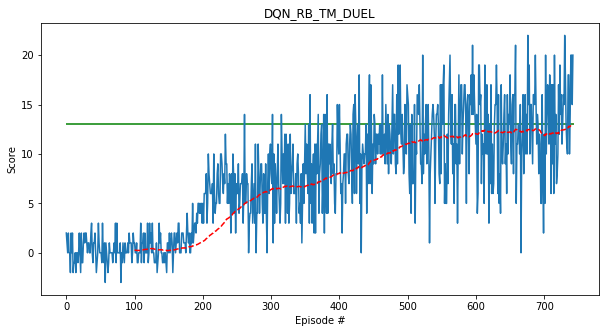



================ Training : DDQN_RB_TM_DUEL ================
Episode 100	Average Score: 0.01
Episode 200	Average Score: -0.06
Episode 300	Average Score: 0.401
Episode 400	Average Score: 1.235
Episode 500	Average Score: 5.26
Episode 600	Average Score: 8.79
Episode 700	Average Score: 12.27
Episode 719	Average Score: 13.04
Environment solved in 619 episodes!	Average Score: 13.04


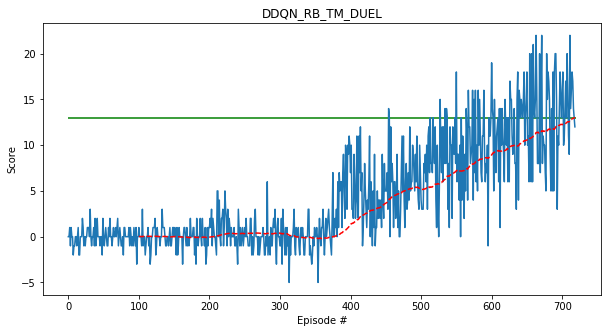



================ Training : DDQN_PER_TM_DUEL_1 ================
Episode 100	Average Score: 0.08
Episode 200	Average Score: 2.44
Episode 300	Average Score: 6.74
Episode 400	Average Score: 8.23
Episode 500	Average Score: 10.55
Episode 600	Average Score: 11.26
Episode 700	Average Score: 11.76
Episode 800	Average Score: 12.81
Episode 879	Average Score: 13.01
Environment solved in 779 episodes!	Average Score: 13.01


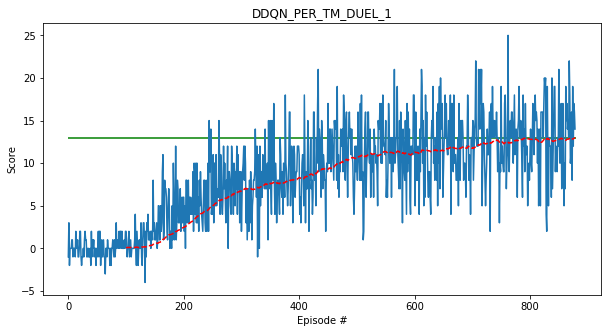



================ Training : DDQN_PER_TM_DUEL_2 ================
Episode 100	Average Score: 0.14
Episode 200	Average Score: 3.00
Episode 300	Average Score: 7.48
Episode 400	Average Score: 9.38
Episode 500	Average Score: 11.41
Episode 600	Average Score: 10.86
Episode 700	Average Score: 11.56
Episode 800	Average Score: 12.71
Episode 808	Average Score: 13.08
Environment solved in 708 episodes!	Average Score: 13.08


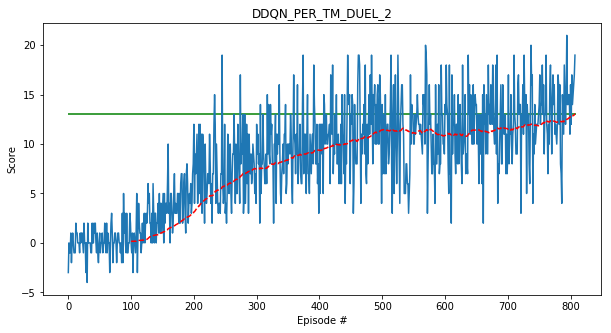



================ Training : DDQN_PER_TM_DUEL_3 ================
Episode 100	Average Score: 0.11
Episode 200	Average Score: 4.11
Episode 300	Average Score: 8.13
Episode 400	Average Score: 10.55
Episode 500	Average Score: 10.50
Episode 600	Average Score: 11.27
Episode 700	Average Score: 11.70
Episode 800	Average Score: 10.80
Episode 900	Average Score: 11.14
Episode 985	Average Score: 13.02
Environment solved in 885 episodes!	Average Score: 13.02


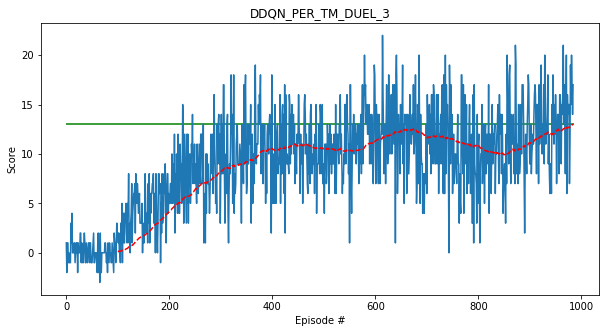



================ Training : DDQN_PER_TM_DUEL_4 ================
Episode 100	Average Score: -0.12
Episode 200	Average Score: 3.291
Episode 300	Average Score: 7.08
Episode 400	Average Score: 8.69
Episode 500	Average Score: 10.78
Episode 600	Average Score: 11.24
Episode 700	Average Score: 11.95
Episode 800	Average Score: 12.32
Episode 900	Average Score: 12.60
Episode 1000	Average Score: 12.02
Episode 1031	Average Score: 13.02
Environment solved in 931 episodes!	Average Score: 13.02


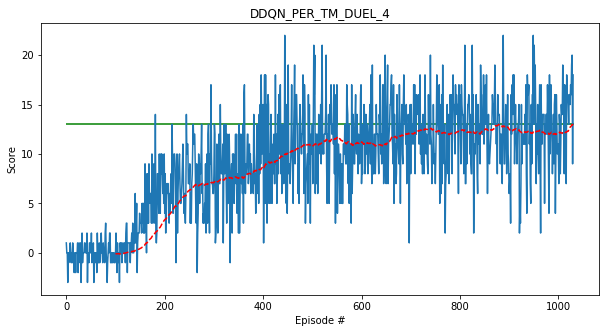



================ Training : DDQN_PER_TM_DUEL_5 ================
Episode 100	Average Score: 0.09
Episode 200	Average Score: 2.241
Episode 300	Average Score: 7.62
Episode 400	Average Score: 9.13
Episode 500	Average Score: 11.34
Episode 600	Average Score: 12.56
Episode 630	Average Score: 13.07
Environment solved in 530 episodes!	Average Score: 13.07


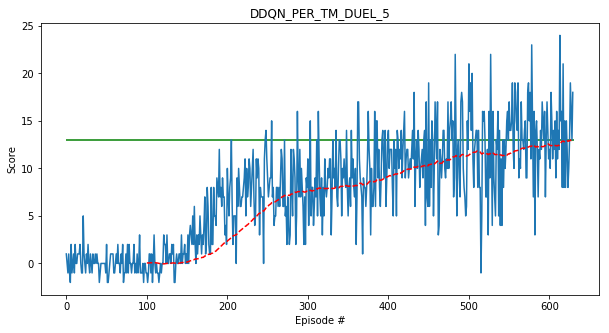



================ Training : DDQN_PER_TM_DUEL_6 ================
Episode 100	Average Score: -0.04
Episode 200	Average Score: 2.941
Episode 300	Average Score: 6.82
Episode 400	Average Score: 8.46
Episode 500	Average Score: 10.64
Episode 600	Average Score: 11.55
Episode 700	Average Score: 11.91
Episode 746	Average Score: 13.08
Environment solved in 646 episodes!	Average Score: 13.08


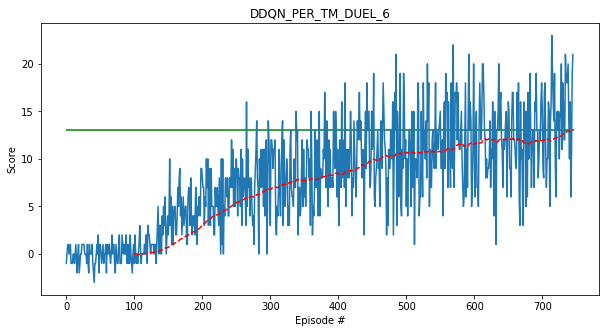



================ Training : DDQN_PER_TM_DUEL_7 ================
Episode 100	Average Score: 0.96
Episode 200	Average Score: 4.38
Episode 300	Average Score: 8.32
Episode 400	Average Score: 10.85
Episode 500	Average Score: 11.26
Episode 600	Average Score: 11.71
Episode 700	Average Score: 11.87
Episode 800	Average Score: 12.68
Episode 841	Average Score: 13.00
Environment solved in 741 episodes!	Average Score: 13.00


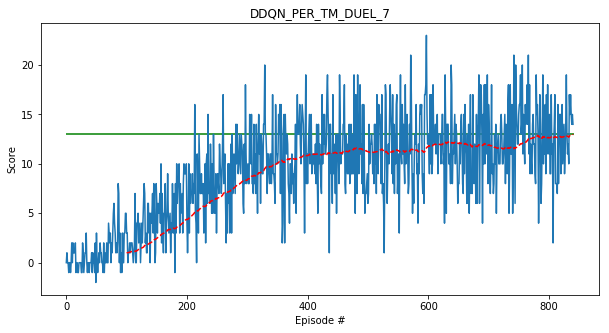



================ Training : DDQN_PER_TM_DUEL_8 ================
Episode 100	Average Score: -0.14
Episode 200	Average Score: 1.014
Episode 300	Average Score: 6.17
Episode 400	Average Score: 8.66
Episode 500	Average Score: 10.43
Episode 600	Average Score: 11.98
Episode 700	Average Score: 12.56
Episode 725	Average Score: 13.03
Environment solved in 625 episodes!	Average Score: 13.03


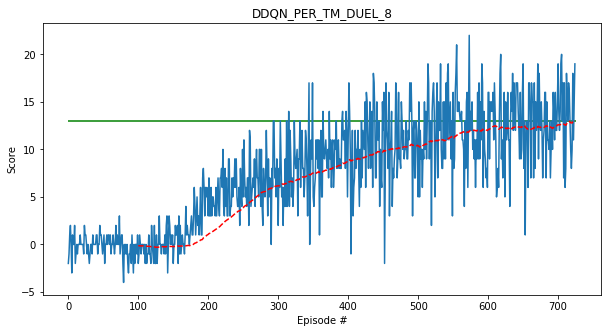



================ Training : DDQN_PER_TM_DUEL_9 ================
Episode 100	Average Score: 0.34
Episode 200	Average Score: 4.36
Episode 300	Average Score: 6.85
Episode 400	Average Score: 9.50
Episode 500	Average Score: 12.51
Episode 580	Average Score: 13.01
Environment solved in 480 episodes!	Average Score: 13.01


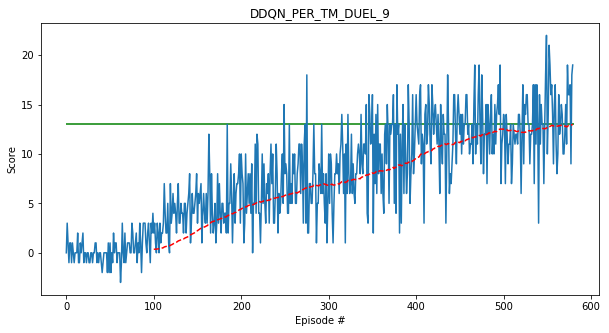

In [7]:
# Start the environment
env = start_UnityEnvironment()

results={}
for config_name in config_of:
    print('\n\n================ Training : {} ================'.format(config_name))
    
    # Build the agent
    agent = Agent(state_size, action_size, seed=0, **config_of[config_name])
    
    # Train the agent
    scores, is_solved, solved_in = dqn(agent,n_episodes=2000
                                            ,score_window_length=SCORE_WINDOW_LENGTH
                                            ,env_solved_threshold=ENV_SOLVED_THRESHOLD
                                      )

    results[config_name] = (scores, is_solved, solved_in)
    
    # If solved, save the weights
    agent.save_weights('checkpoint_{}.pth'.format(config_name))
    
    
    cumsum = np.cumsum(scores)
    means = (cumsum[SCORE_WINDOW_LENGTH:] - cumsum[:-SCORE_WINDOW_LENGTH]) / SCORE_WINDOW_LENGTH
    
    # plot the scores
    fig = plt.figure(figsize=(10,5))
    plt.hlines(ENV_SOLVED_THRESHOLD,0,len(scores),'g')
    plt.plot(np.arange(len(scores)), scores)
    plt.plot(np.arange(len(scores))[SCORE_WINDOW_LENGTH:], means, 'r--')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.title(config_name)
    plt.show()

# Close the environment
env.close()    

#### 4.5 Plot of rolling avg for all experiment

We plot first the experiments that do not include the PER using different alpha, then we plot only the PER.
We can see from those plots that the configuration that perform the best is DDQN_PER_TM_DUEL_9.

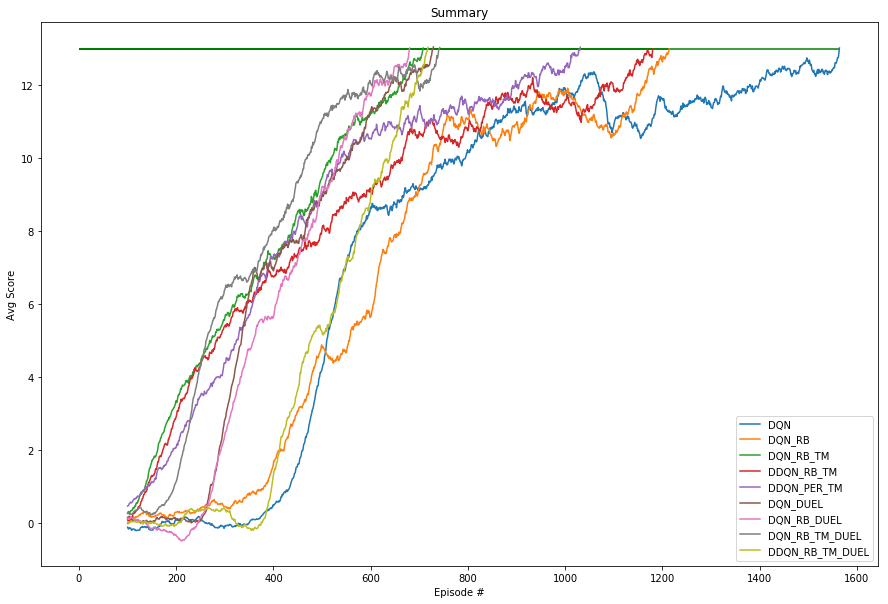

In [14]:
fig = plt.figure(figsize=(15,10))

for config_name in results:
    if 'DDQN_PER_TM_DUEL' not in config_name:
        scores = results[config_name][0]

        cumsum = np.cumsum(scores)
        means = (cumsum[SCORE_WINDOW_LENGTH:] - cumsum[:-SCORE_WINDOW_LENGTH]) / SCORE_WINDOW_LENGTH

        # plot the scores
        plt.hlines(ENV_SOLVED_THRESHOLD,0,len(scores),'g')
        plt.plot(np.arange(len(scores))[SCORE_WINDOW_LENGTH:], means, label=config_name)

plt.ylabel('Avg Score')
plt.xlabel('Episode #')
plt.title('Summary')
plt.legend(loc='lower right')
plt.show()


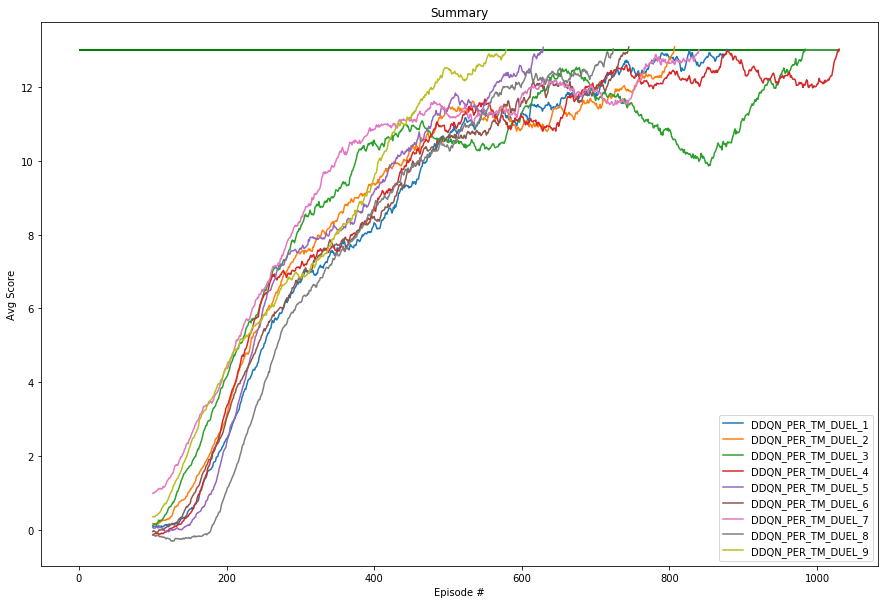

In [15]:
fig = plt.figure(figsize=(15,10))

for config_name in results:
    if 'DDQN_PER_TM_DUEL' in config_name:
        scores = results[config_name][0]

        cumsum = np.cumsum(scores)
        means = (cumsum[SCORE_WINDOW_LENGTH:] - cumsum[:-SCORE_WINDOW_LENGTH]) / SCORE_WINDOW_LENGTH

        # plot the scores
        plt.hlines(ENV_SOLVED_THRESHOLD,0,len(scores),'g')
        plt.plot(np.arange(len(scores))[SCORE_WINDOW_LENGTH:], means, label=config_name)

plt.ylabel('Avg Score')
plt.xlabel('Episode #')
plt.title('Summary')
plt.legend(loc='lower right')
plt.show()


#### 4.6 Watch a smart agent

Here we use the best configuration DDQN_PER_TM_DUEL_9

In [11]:
best_config_name='DDQN_PER_TM_DUEL_9'


# Start the environment
env = start_UnityEnvironment()

# load the weights from file
agent = Agent(state_size, action_size, seed=0, **config_of[best_config_name])
agent.load_weights('checkpoint_{}.pth'.format(best_config_name))

# watch a smart agent
for i_episode in range(1,6):
    score = 0
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    while True:
        action = agent.act(state)

        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished

        score += reward
        
        print('\rEpisode {}\tScore: {}'.format(i_episode, score), end="")
        
        state = next_state
        if done:
            break
    print('\rEpisode {}\tScore: {}'.format(i_episode, score))

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 1	Score: 14.0
Episode 2	Score: 18.0
Episode 3	Score: 8.0
Episode 4	Score: 15.0
Episode 5	Score: 23.0
